In [78]:
import pandas as pd
import numpy as np
import warnings

In [79]:
warnings.filterwarnings("ignore")

In [80]:
car_sales = pd.read_csv("./data/sale_dataset.csv")
car_sales

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [81]:
car_sales.dtypes,len(car_sales)

(Manufacturer            object
 Model                   object
 Sales_in_thousands     float64
 __year_resale_value    float64
 Vehicle_type            object
 Price_in_thousands     float64
 Engine_size            float64
 Horsepower             float64
 Wheelbase              float64
 Width                  float64
 Length                 float64
 Curb_weight            float64
 Fuel_capacity          float64
 Fuel_efficiency        float64
 Latest_Launch           object
 Power_perf_factor      float64
 dtype: object,
 157)

In [82]:
car_sales['Latest_Launch'].value_counts() #it is not clear categorical
car_sales = car_sales.drop('Latest_Launch',axis=1)
car_sales.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639


# Optimizing data for better results
<br>
<br>


<li> Removing or Reducing dimensions for better accuracy and prevent overfitting of the model

In [83]:
car_sales.drop(["Manufacturer","Model","__year_resale_value","Engine_size","Wheelbase","Width","Curb_weight"],axis =1,inplace =True)

In [84]:
car_sales

,Sales_in_thousands,Vehicle_type,Price_in_thousands,Horsepower,Length,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,Passenger,21.50,140.0,172.4,13.2,28.0,58.280150
1,39.384,Passenger,28.40,225.0,192.9,17.2,25.0,91.370778
2,14.114,Passenger,NaN,225.0,192.0,17.2,26.0,NaN
3,8.588,Passenger,42.00,210.0,196.6,18.0,22.0,91.389779
4,20.397,Passenger,23.99,150.0,178.0,16.4,27.0,62.777639
...,...,...,...,...,...,...,...,...
152,3.545,Passenger,24.40,160.0,176.6,15.8,25.0,66.498812
153,15.245,Passenger,27.50,168.0,185.9,17.9,25.0,70.654495
154,17.531,Passenger,28.80,168.0,186.2,17.9,25.0,71.155978
155,3.493,Passenger,45.50,236.0,185.7,18.5,23.0,101.623357


# Cleaning Data

In [85]:
# column_means = car_sales.mean(axis=0)
# column_means
car_sales['Sales_in_thousands'].mean()


52.99807643312102

In [86]:
for col in car_sales.columns:
    if car_sales[col].dtypes == 'float64':
        car_sales[col] = car_sales[col].fillna(car_sales[col].mean())
    else :
        car_sales[col].dropna()

In [87]:
car_sales.head()

,Sales_in_thousands,Vehicle_type,Price_in_thousands,Horsepower,Length,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,Passenger,21.500000,140.0,172.4,13.2,28.0,58.280150
1,39.384,Passenger,28.400000,225.0,192.9,17.2,25.0,91.370778
2,14.114,Passenger,27.390755,225.0,192.0,17.2,26.0,77.043591
3,8.588,Passenger,42.000000,210.0,196.6,18.0,22.0,91.389779
4,20.397,Passenger,23.990000,150.0,178.0,16.4,27.0,62.777639


In [88]:
car_sales.isna().sum() #all null values resolved

Sales_in_thousands    0
Vehicle_type          0
Price_in_thousands    0
Horsepower            0
Length                0
Fuel_capacity         0
Fuel_efficiency       0
Power_perf_factor     0
dtype: int64

In [89]:
# spliting into X and Y
X = car_sales.drop("Power_perf_factor",axis =1)# all other factors are used for estimation

In [90]:
Y = car_sales["Power_perf_factor"] # Estimate the Power_Performance Factor

In [91]:
X.head()

,Sales_in_thousands,Vehicle_type,Price_in_thousands,Horsepower,Length,Fuel_capacity,Fuel_efficiency
0,16.919,Passenger,21.500000,140.0,172.4,13.2,28.0
1,39.384,Passenger,28.400000,225.0,192.9,17.2,25.0
2,14.114,Passenger,27.390755,225.0,192.0,17.2,26.0
3,8.588,Passenger,42.000000,210.0,196.6,18.0,22.0
4,20.397,Passenger,23.990000,150.0,178.0,16.4,27.0


In [92]:
Y.head()

0    58.280150
1    91.370778
2    77.043591
3    91.389779
4    62.777639
Name: Power_perf_factor, dtype: float64

# Encoding Categorical Data


In [93]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

category = ["Vehicle_type"]#categorical labels
one_hot = OneHotEncoder() # instantiation
trans = ColumnTransformer([('one_hot',
                            one_hot,
                            category
                           )],remainder ='passthrough') # instantiation


X_new = trans.fit_transform(X) 


In [94]:
# df = pd.DataFrame(trans.fit_transform(X).toarray()) #as it was giving tupple
pd.DataFrame(trans.fit_transform(X))
# df

,0,1,2,3,4,5,6,7
0,0.0,1.0,16.919,21.500000,140.0,172.4,13.2,28.0
1,0.0,1.0,39.384,28.400000,225.0,192.9,17.2,25.0
2,0.0,1.0,14.114,27.390755,225.0,192.0,17.2,26.0
3,0.0,1.0,8.588,42.000000,210.0,196.6,18.0,22.0
4,0.0,1.0,20.397,23.990000,150.0,178.0,16.4,27.0
...,...,...,...,...,...,...,...,...
152,0.0,1.0,3.545,24.400000,160.0,176.6,15.8,25.0
153,0.0,1.0,15.245,27.500000,168.0,185.9,17.9,25.0
154,0.0,1.0,17.531,28.800000,168.0,186.2,17.9,25.0
155,0.0,1.0,3.493,45.500000,236.0,185.7,18.5,23.0


 <b> Alternate method :</b>

In [95]:
dum = pd.get_dummies(car_sales[["Vehicle_type"]])
dum

,Vehicle_type_Car,Vehicle_type_Passenger
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
152,0,1
153,0,1
154,0,1
155,0,1


# Dividing Dataset

In [96]:
#Split into training and testing
from sklearn.model_selection import train_test_split

In [97]:
np.random.seed(29)
X_train,X_test,Y_train,Y_test = train_test_split(X_new,Y,test_size=0.3)

In [98]:
type(X_train),type(Y_train)

(numpy.ndarray, pandas.core.series.Series)

# Training a Regression Model

In [99]:
# Building a regressor
from sklearn.ensemble import RandomForestRegressor 

In [100]:
model = RandomForestRegressor() #instantiation

In [101]:
model.fit(X_train,Y_train);

In [102]:
model.score(X_test,Y_test) 

0.9090068250900993

<b> Good Regression Model as its score closer to 1 </b>

<li> Results are Accurate and Thus we can say the Predictions by the model have high Probablity of being True values

In [103]:
Y_predict = model.predict(X_test)

In [104]:
import matplotlib.pyplot as plt

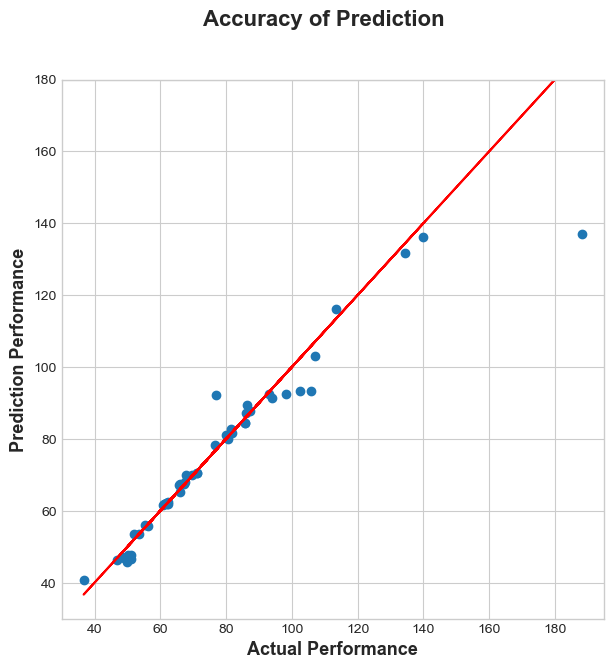

In [105]:
plt.style.use("seaborn-whitegrid")
fig,ax = plt.subplots(figsize=(7,7))
ax.scatter(Y_test,Y_predict)
ax.set_xlim([30,195])
ax.set_ylim([30,180])
# ax.set(xlabel="Actual",ylabel="Predicted")
ax.plot(Y_test,Y_test,c="red")
ax.set_xlabel("Actual Performance",fontweight = "bold",fontsize=13)
ax.set_ylabel("Prediction Performance",fontweight = "bold",fontsize=13)
fig.suptitle("Accuracy of Prediction",fontweight = "bold",fontsize=16);


In [106]:
import pickle

In [107]:
pickle.dump(model,open('./Trained_Model/Car_Performance_Model.pkl','wb'))

In [108]:
fig.savefig('./images/PerformaceModel.png')